<a href="https://colab.research.google.com/github/SrMouraSilva/Introducao-a-Modelagem/blob/main/3_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd

# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()

In [ ]:
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 3.9
 
(Continuation of Exercise 8) Repeat Exercise 8, but now assume an alternative model of the relationship between advertising expenditures and sales. Suppose that doubling the advertising budget results in $1{,}000$ additional sales, but doubling it again results in only $500$ additional sales, and so forth. Repeat parts (a) through (c) of Exercise 8. In part (c), determine the sensitivity to the assumption of $1{,}000$ additional sales the first time the advertising budget is doubled. Compare your results to those obtained in Exercise 8, and comment on the robustness of the model.


### a) Find the price and the advertising budget that will maximize profit. Use the five-step method, and model as an unconstrained optimization problem.


#### Passo 1 - Variáveis
 
* $s$ = total de unidades de computadores pessoais do modelo básico vendidos por mês (vendas/mês); \\
* $s_{\text{original}}$ = total original de unidades de computadores pessoais do modelo básico vendidos por mês (vendas/mês) (sem desconto no preço do computador ou aumento das despesas em publicidade) ($\$$); \\
* $s_{\text{desconto}}$ = incremento das vendas de computadores pessoais pelo desconto dado ao valor original de venda (vendas/mês); \\
* $s_{\text{propaganda}}$ = incremento das vendas de computadores pessoais pelo incremento do aumento das despesas com publicidade; \\
 
 
* $c$ = custo de produção do computador pessoal do modelo básico ($\$$);
* $p_{\text{original}}$ = preço de venda original de um computador pessoal de modelo básico (preço sem desconto) ($\$$); \\
* $p$ = preço de venda de um computador pessoal do modelo básico ($\$$); \\
 
 
* $a_{\text{original}}$ = custo original das despesas com propaganda (sem aumento de despesas) ($\$$);
* $a$ = custo total com propaganda ($\$$);
* $C$ = custo de manufatura para produzir $s$ aparelhos ($\$$/mês);
* $R$ = rendimento na venda dos aparelhos ($\$$);
* $L$ = lucro obtido pela venda de $s$ computadores pessoais ($\$$);

#### Passo 1 - Suposições do problema

In [ ]:
a = var('a', real=True)
p = var('p', real=True)
 
c = 700
p_original = 950
a_original = 50_000
s_original = 10_000
 
s_desconto = s_original * 0.5 * (p_original - p) / 100
s_propaganda = 1_000 * 2 * (1-a_original/a)
 
s = s_original + s_desconto + s_propaganda
 
C = c*s
R = p*s
L = R - C - a

Um gráfico 3D é apresentado a seguir para nos auxiliar no entendimento do comportamento da equação. O eixo $x$ representa os valores para o preço do produto $p$. Já o eixo $y$ representa $a$, o total gasto com publicidade. O intervalo definido para $p$ corresponde de 700 ( valor no qual  não há lucro algum sobre a venda) a 1200. O eixo $z$ corresponde ao lucro da venda dos computadores pessoais.

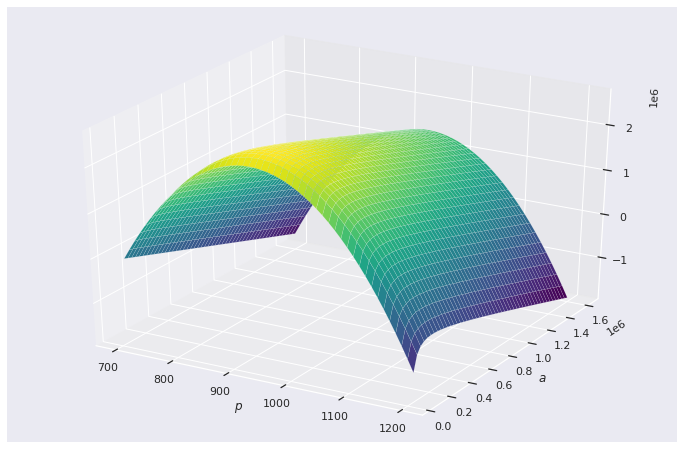

In [ ]:
plot3d(L, (p, 700, 1200), (a, 50_000, 1_600_000), xlabel='$p$', ylabel='$a$', zlabel='Lucro')

#### Passo 2 - Abordagem de modelagem
 
Problema de otimização multidimensional sem restrição cujo objetivo é maximizar o lucro obtido pela venda de computadores pessoais sem respeitar o orçamento máximo para publicidade, conforme o enuncado da questão.


#### Passo 3 - Formulação do modelo
 
$$
\begin{align}
\text{max} ~~& f(p, a) \\
\text{sujeito a} ~~& p, a \in \Omega \\
\end{align}
$$
 
Sendo:
* $f(p, a)$: Função objetivo
* $\Omega$: Espaço viável das variáveis do problema.
 
Dado que não é aplicado qualquer restrição, temos:
 
$$
\begin{align}
\text{max} ~~& f(p, a) = R - C - a \\
\end{align}
$$

#### Passo 4 - Resolução do modelo
 
Função a ser otimizada:

In [ ]:
f = L
Math(f"f(p, a)={latex(f)}")

<IPython.core.display.Math object>

O vetor gradiente
$$\nabla f(p, a) = 
\left[
\begin{matrix}
    \frac{\partial f(p, a)}{\partial p} \\
    \frac{\partial f(p, a)}{\partial a}
\end{matrix}
\right]
$$
como

In [ ]:
grad_f = Matrix(derive_by_array(f, (p, a)))

display(Math(f"\\nabla f(p, a) = {latex(grad_f)}."))

<IPython.core.display.Math object>

Calculando $\nabla f(p, a) = \mathbf{0}$, temos três soluções

In [ ]:
s_a = solve(grad_f, [p, a], dict=True, rational=True)
 
display(Math(f"""
\\begin{{aligned}}
\mathbf{{0}} &= \\nabla f(p, a) \\\\
\mathbf{{0}} &= {latex(grad_f)}
\\end{{aligned}}
"""))
for i, solucao in enumerate(s_a):
    display(Math(f"""
\\begin{{aligned}}
\\text{{\\textbf{{Solução {i+1}}}}} &  \\\\
p &= {latex(solucao[p])} = {latex(N(solucao[p]))} \\\\
a &= {latex(solucao[a])} = {latex(N(solucao[a]))} \\\\
\\text{{Lucro: }} & {latex(N(L.subs(solucao)))} \\\\
\\end{{aligned}}
    """))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Nota-se que a primeira solução trata o problema como um problema de minimização. Já a terceira considera um valor de despesas de marketing negativo. Apesar do problema ser tratado sem restrições, o valor dado para o marketing corresponde a $-158{,}526$ cujo módulo é três vezes maior que o valor das despesas de marketing sem qualquer aumento, logo essa resposta não é aplicável para a resolução do problema. Assim, a segunda solução apresenta o valor no qual desejamos.
 
Nota-se ainda que nas três soluções, existe uma parte imaginária muito baixa. Logo, será considerado na resposta somente os valores reais.

#### Passo 5 - Resposta da pergunta

A resposta obtida pelo modelo matemático proposto é que o lucro máximo obtido passará de $\$2{,}450{,}000$ para $\$2{,}690{,}268.62684739$ ao
* aumentar de $\$50{,}000$ para $\$154{,}442.578858178$ de investimento em publicidade;
* diminuir o valor do produto de $\$950$ para aproximadamente $\$938.53$.

### b) determine the sensitivity of the decision variables (price and advertising budget) to price elasticity (the 50% number).

Suponhamos que a elasticidade do preço não seja mais o valor fixo $0.5$, mas dependa de uma variável $r$.

Assim, temos a função $f(p, a;r)$ sendo como:

In [ ]:
p, a, r = var('p, a, r', real=True)

c = 700
p_original = 950
a_original = 50_000
s_original = 10_000

s_desconto = s_original * r * (p_original - p) / 100
s_propaganda = 1_000 * 2 * (1-a_original/a)

s = s_original + s_desconto + s_propaganda

C = c*s
R = p*s
L = R - C - a

f = L
Math(f"f(p, a; r) = {latex(f)}")

<IPython.core.display.Math object>

As derivadas parciais primeiras como:

In [ ]:
dfdp = diff(f, p)
dfda = diff(f, a)

Math(f"""
\\begin{{aligned}}
\\frac{{\\partial}}{{\\partial p}} df(p,a;r) &= {latex(dfdp)} \\\\
\\frac{{\\partial}}{{\\partial a}} df(p,a;r) &= {latex(dfda)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Igualando-as a zero, teremos:

In [ ]:
s_b = solve([dfdp, dfda], [p, a], dict=True, rational=True)

for i, solucao in enumerate(s_a):
    display(Math(f"""
\\begin{{aligned}}
\\text{{\\textbf{{Solução {i+1}}}}} &  \\\\
p &= {latex(N(s_b[i][p]))} \\\\
a &= {latex(s_b[i][a])} \\\\
\\end{{aligned}}
    """))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Dado que houve mais de uma solução, substituiremos $r$ pelo valor inicial esperado para saber qual das soluções corresponde a maximizar o problema.

In [ ]:
for i, solucao in enumerate(s_b):
    display(Math(f"\\text{{Solução {i+1}}}"))
    for variavel, equacao in solucao.items():
        display(Math(f"""{latex(variavel)} = {latex(N(equacao.subs({r: 0.5})))}"""))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Comparando com o item $a)$, vemos que é a Solução 2. Logo, será considerado somente esta solução para os passos seguintes.

Agora derivando-as em relação a $r$, teremos

In [ ]:
dpdr = diff(s_b[1][p], r)
dadr = diff(s_b[1][a], r)

Math(f"""
\\begin{{aligned}}
\\frac{{\\text{{d}} p}}{{\\text{{d}} r}} &= {latex(dpdr)} \\\\
\\frac{{\\text{{d}} a}}{{\\text{{d}} r}} &= {latex(dadr)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Então, para os pontos $p= 938.52...$, $a =154,442...$ e $r=0.5$, obteremos

In [ ]:
solucao = {
    p: N(s_a[1][p]),
    a: N(s_a[1][a]),
    r: 0.5
}

Math(f"""
\\begin{{aligned}}
S(p, r) &= \\frac{{\\text{{d}} p}}{{\\text{{d}} r}} \cdot \\frac{{r}}{{p}} = {latex(N((dpdr * r/p).subs(solucao)))} \\\\
S(a, r) &= \\frac{{\\text{{d}} a}}{{\\text{{d}} r}} \cdot \\frac{{r}}{{a}} = {latex(N((dadr * r/a).subs(solucao)))}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

 
Nota-se que nestas análises de sensiblidade, existe uma parte imaginária muito baixa. Logo, será considerado somente os valores reais para os passos seguintes.
 
Podemos então concluir que para cada $1\%$ de variação de crescimento de $r$, tem-se uma redução de aproximadamente $0.1226\%$ no valor do produto ($p$) e uma redução de $0.2412\%$ no total gasto em publicidade ($a$).

### c) Determine the sensitivity of the decision variables to the advertising agency's estimate of $1{,}000$ new sales each time the advertising budget is doubled.

Suponhamos que a quantidade de vendas que aumenta a cada vez que as despesas com publicidade dobra não seja mais o valor fixo de $\$1,000$, mas dependa de uma variável $r$.

Assim, temos a função $f(p, a;r)$ sendo como:


In [ ]:
p, a, r = var('p, a, r', real=True)
 
c = 700
p_original = 950
a_original = 50_000
s_original = 10_000

s_desconto = s_original * 0.5 * (p_original - p) / 100
s_propaganda = r * 2 * (1-a_original/a)
 
s = s_original + s_desconto + s_propaganda
 
C = c*s
R = p*s
L = R - C - a
 
 
f = L
Math(f"f(p, a; r) = {latex(f)}")

<IPython.core.display.Math object>

As derivadas parciais primeiras como:

In [ ]:
dfdp = diff(f, p)
dfda = diff(f, a)

Math(f"""
\\begin{{aligned}}
\\frac{{\\partial}}{{\\partial p}} df(p,a;r) &= {latex(dfdp)} \\\\
\\frac{{\\partial}}{{\\partial a}} df(p,a;r) &= {latex(dfda)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Igualando-as a zero, teremos:

In [ ]:
s_c = solve([dfdp, dfda], [p, a], dict=True, rational=True)
 
 
for i, solucao in enumerate(s_c):
    display(Math(f"""
\\begin{{aligned}}
\\text{{\\textbf{{Solução {i+1}}}}} &  \\\\
p &= {latex(simplify(solucao[p]))} \\\\
a &= {latex(solucao[a])}
\\end{{aligned}}
    """))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Dado que houve mais de uma solução, substituiremos $r$ pelo valor inicial esperado para saber qual das soluções corresponde a maximizar o problema.

In [ ]:
for i, solucao in enumerate(s_c):
    display(Math(f"\\text{{Solução {i+1}}}"))
    for variavel, equacao in solucao.items():
        display(Math(f"""{latex(variavel)} = {latex(N(equacao.subs({r: 1_000})))}"""))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Comparando com o item $a)$, vemos que é a Solução 2. Logo, será considerado somente esta solução para os passos seguintes.
 
Agora derivando-as em relação a $r$, teremos

In [ ]:
dpdr = diff(s_c[1][p], r)
dadr = diff(s_c[1][a], r)

Math(f"""
\\begin{{aligned}}
\\frac{{\\text{{d}} p}}{{\\text{{d}} r}} &= {latex(dpdr)} \\\\
\\frac{{\\text{{d}} a}}{{\\text{{d}} r}} &= {latex(dadr)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Então, para os pontos $p= 938.52...$, $a=154{,}442...$ e $r=1{,}000$, obteremos

In [ ]:
valores = {
    p: N(s_a[1][p]),
    a: N(s_a[1][a]),
    r: 1_000
}
 
 
dpdr = diff(s_c[1][p], r)
dadr = diff(s_c[1][a], r)
 
display(Math(f"""
\\begin{{aligned}}
S(p, r) &= \\frac{{\\text{{d}} p}}{{\\text{{d}} r}} \cdot \\frac{{r}}{{p}} = {latex(N((dpdr * r/p).subs(valores)))} \\\\
S(a, r) &= \\frac{{\\text{{d}} a}}{{\\text{{d}} r}} \cdot \\frac{{r}}{{a}} = {latex(N((dadr * r/a).subs(valores)))}
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

Nota-se que nestas análises de sensiblidade, existe uma parte imaginária muito baixa. Logo, será considerado somente os valores reais para os passos seguintes.
 
Podemos então concluir que para cada $1\%$ de variação de crescimento de $r$, tem-se um aumento de aproximadamente $0.0181\%$ no valor do produto ($p$) e um aumento de $0.5356\%$ no total gasto em publicidade ($a$).

### **Parte final da questão:** Compare your results to those obtained in Exercise 8, and comment on the robustness of the model

Os valores de $a$, $p$ e lucro encontrados no item a) da questão 8 do capítulo 3 foram $p = 953.72$, $a = 366{,}040$ e lucro $= 2{,}852{,}652$ se comparados com os valores de $p = 938.53$, $a = 154{,}442$ e lucro = $2{,}690{,}268$ encontrados no item a) desta questão, podemos observar que o erro relativo para a variável $p$ é próximo de zero. Já o erro relativo para a variável $a$ não é próximo de zero. 
 
* $r_p = \frac{953.72 - 938.53}{953.72} = 0.0159$
* $r_a = \frac{366{,}040 - 154{,}442}{366{,}040} = 0.5781$
 
Já os lucros são pouco próximos. Por fim, o modelo da questão 9 é robusto, pois se gasta menos do que a metade que se foi gasto em propaganda no modelo da questão 8, e há uma pequena diminuição no preço da venda de um computador pessoal do modelo básico comparado com o modelo da questão 8 mesmo assim a diferença entre o lucro do modelo da questão 8 e o lucro do modelo da questão 9 foi de apenas 162,384. Assim, faz mais sentido utilizar o modelo da questão 9 para a realidade, pois se gasta menos em publicidade.  